# 🚀 MoodLens: A Streaming Framework for Facial Sentimental Analysis

This notebook demonstrates the development of a facial emotion detection system using the YOLO object detection framework and a custom-labeled dataset from Roboflow. The workflow covers model training, evaluation, inference on new images, and integration with WhatsApp for automated SOS alerts when at-risk emotions are detected

📚 Table of Contents

1. [Install Dependencies](#Dependencies)
2. [Import Libraries](#Libraries)
3. [Dataset Acquisition](#Dataset)
4. [Model Training](#YOLOv11)
5. [Training Visualization](#Evaluation)
6. [Model Validation](#Validate)
7. [Inference on Images](#inference)
8. [SOS Alert System](#SOS)
9. [Conclusion](#Conclusion)

In [1]:
!nvidia-smi

Tue May 27 09:25:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

1. Install Dependencies <a name="install"></a>

Install the required Python packages for model training, data handling, and messaging integration.


In [2]:
!pip install ultralytics

2. Import Libraries <a name="import"></a>

Import necessary libraries for model training, inference, and visualization.


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.6/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

3. Dataset Acquisition <a name="data"></a>

Download the facial emotion dataset from Roboflow. This dataset contains images annotated with emotions like happy, sad, fear, etc.

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("workenv-dayet").project("facial-emotion-dataset-7g1jd-hipbk")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [6]:
dataset.location

'/content/Facial-Emotion-Dataset--3'

4. Model Training <a name="train"></a>

Train a YOLOv11 model on the acquired dataset.

In [7]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=100 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 108MB/s]
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Facial-Emotion-Dataset--3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

5. Training Visualization <a name="visualize"></a>

Visualize the results of the training process, including the confusion matrix and sample predictions.

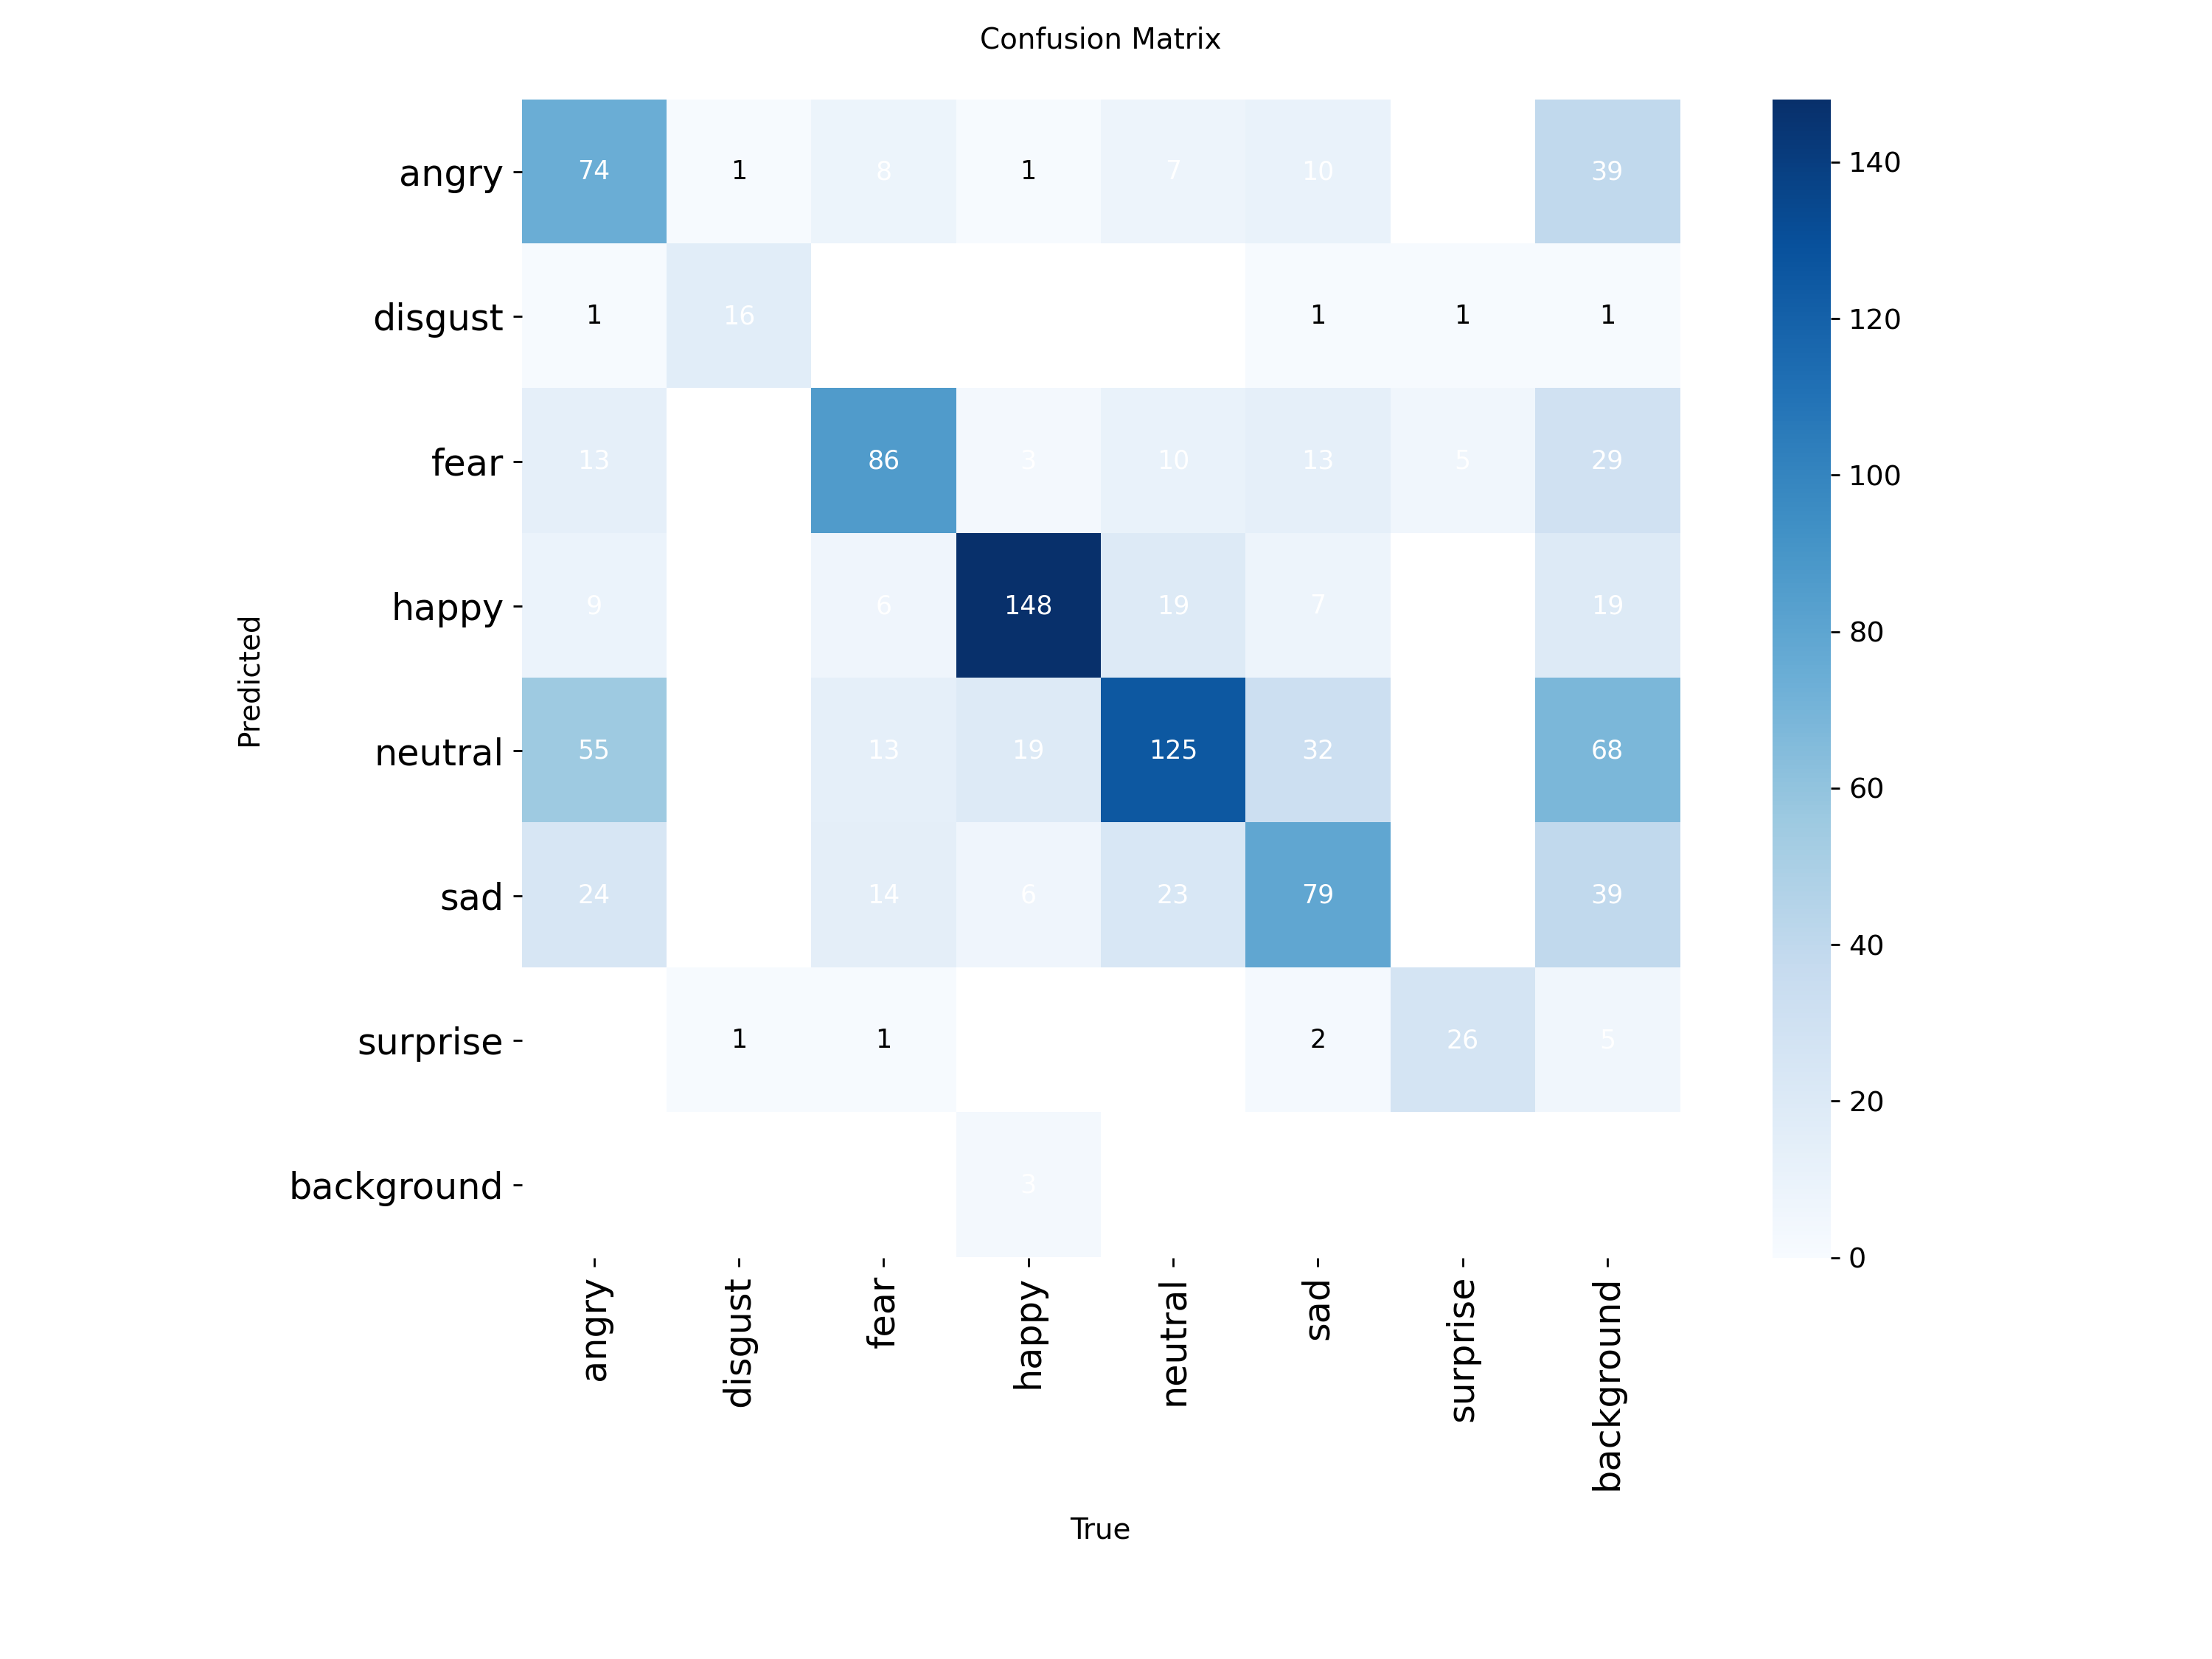

In [8]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

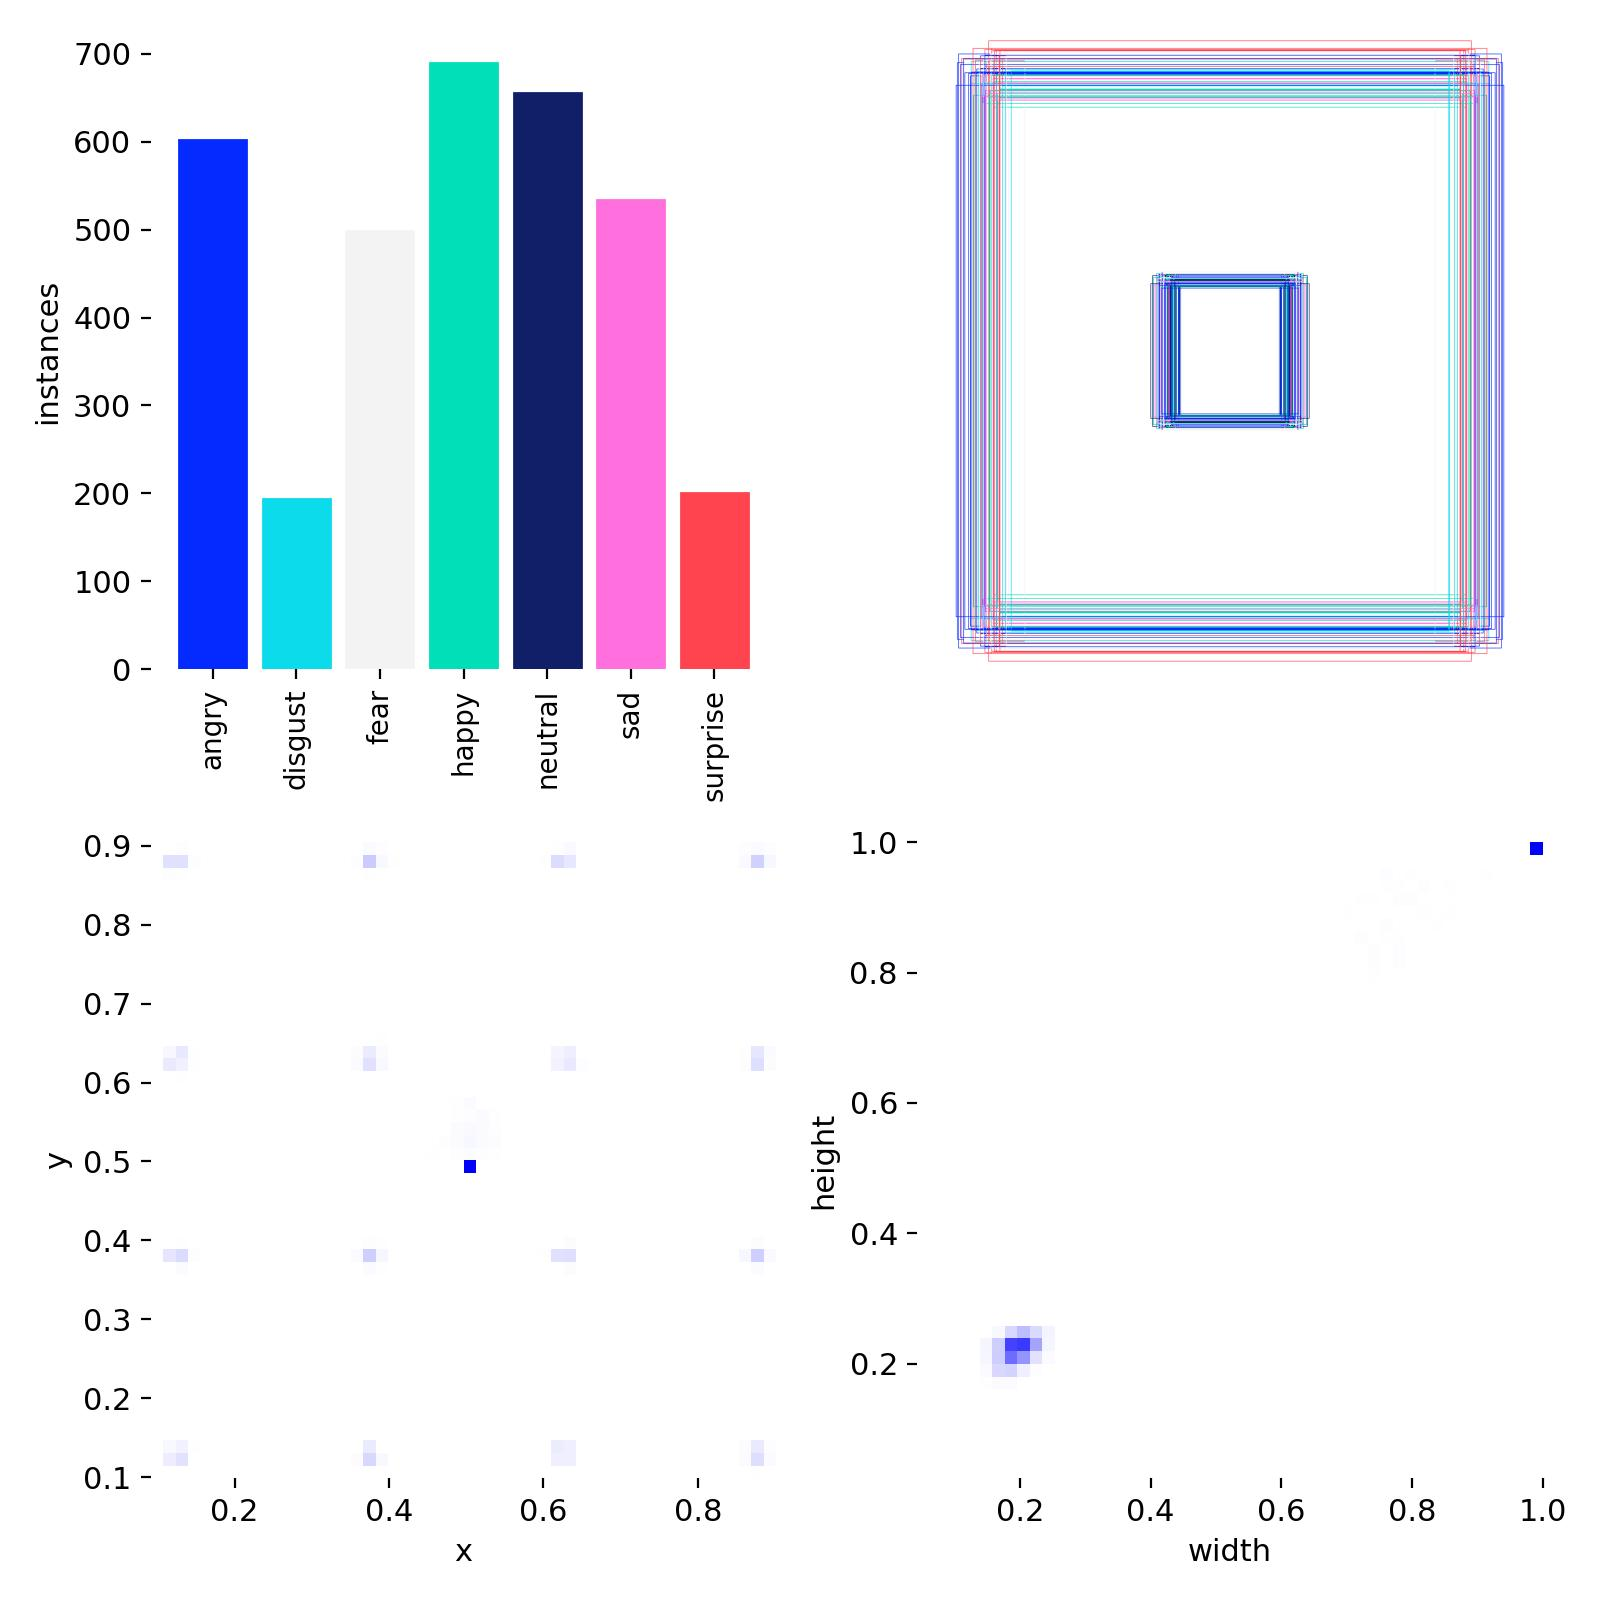

In [9]:
Image("/content/runs/detect/train/labels.jpg", width=600)

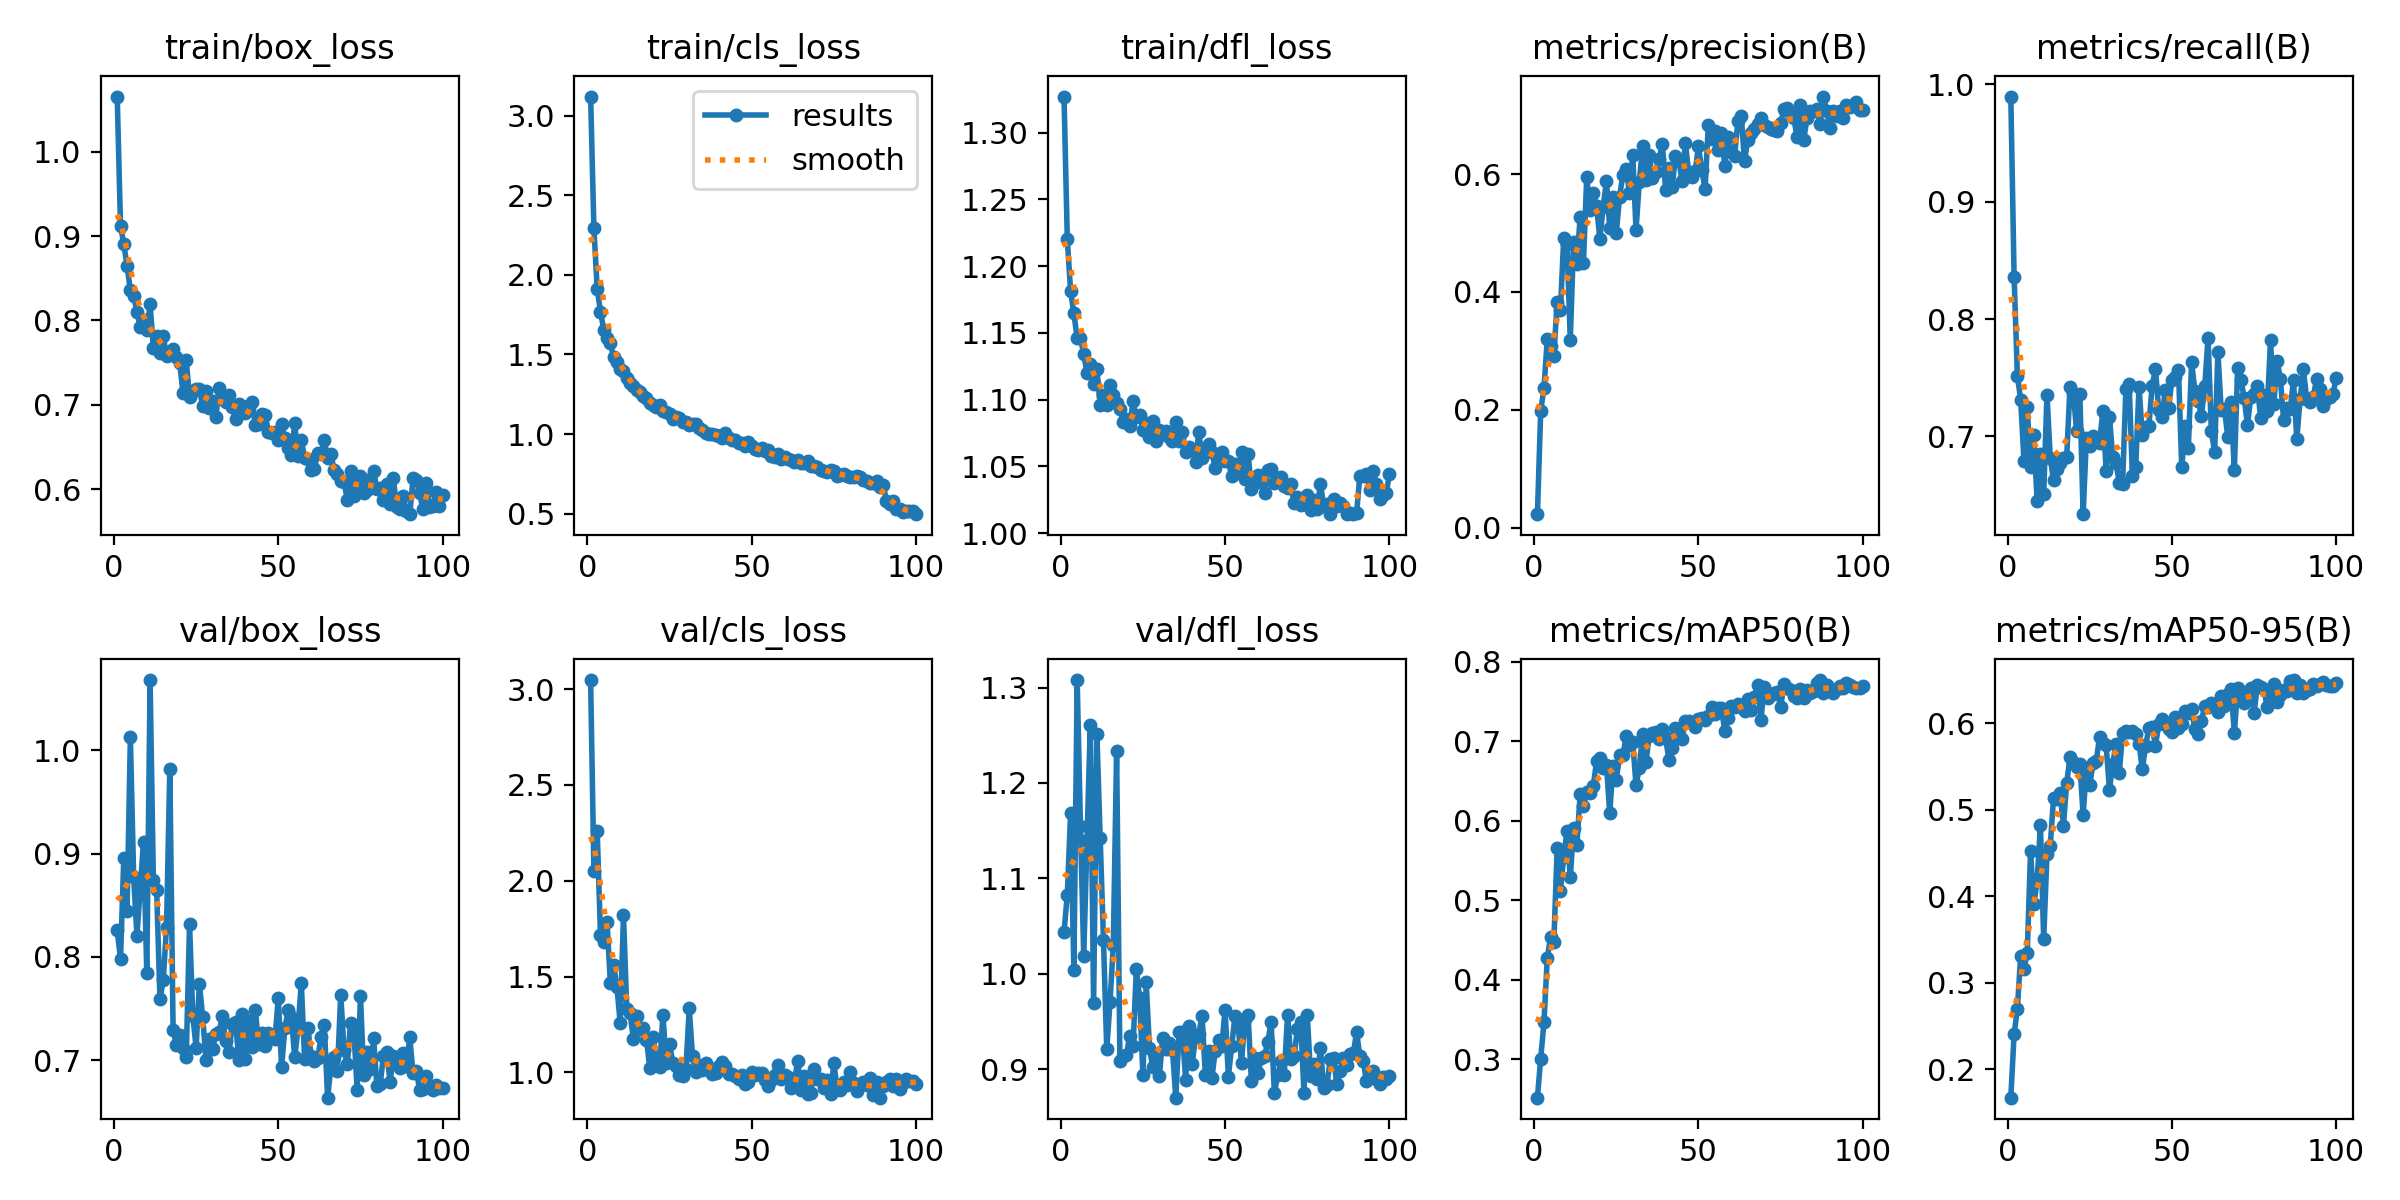

In [10]:
Image("/content/runs/detect/train/results.png", width=600)

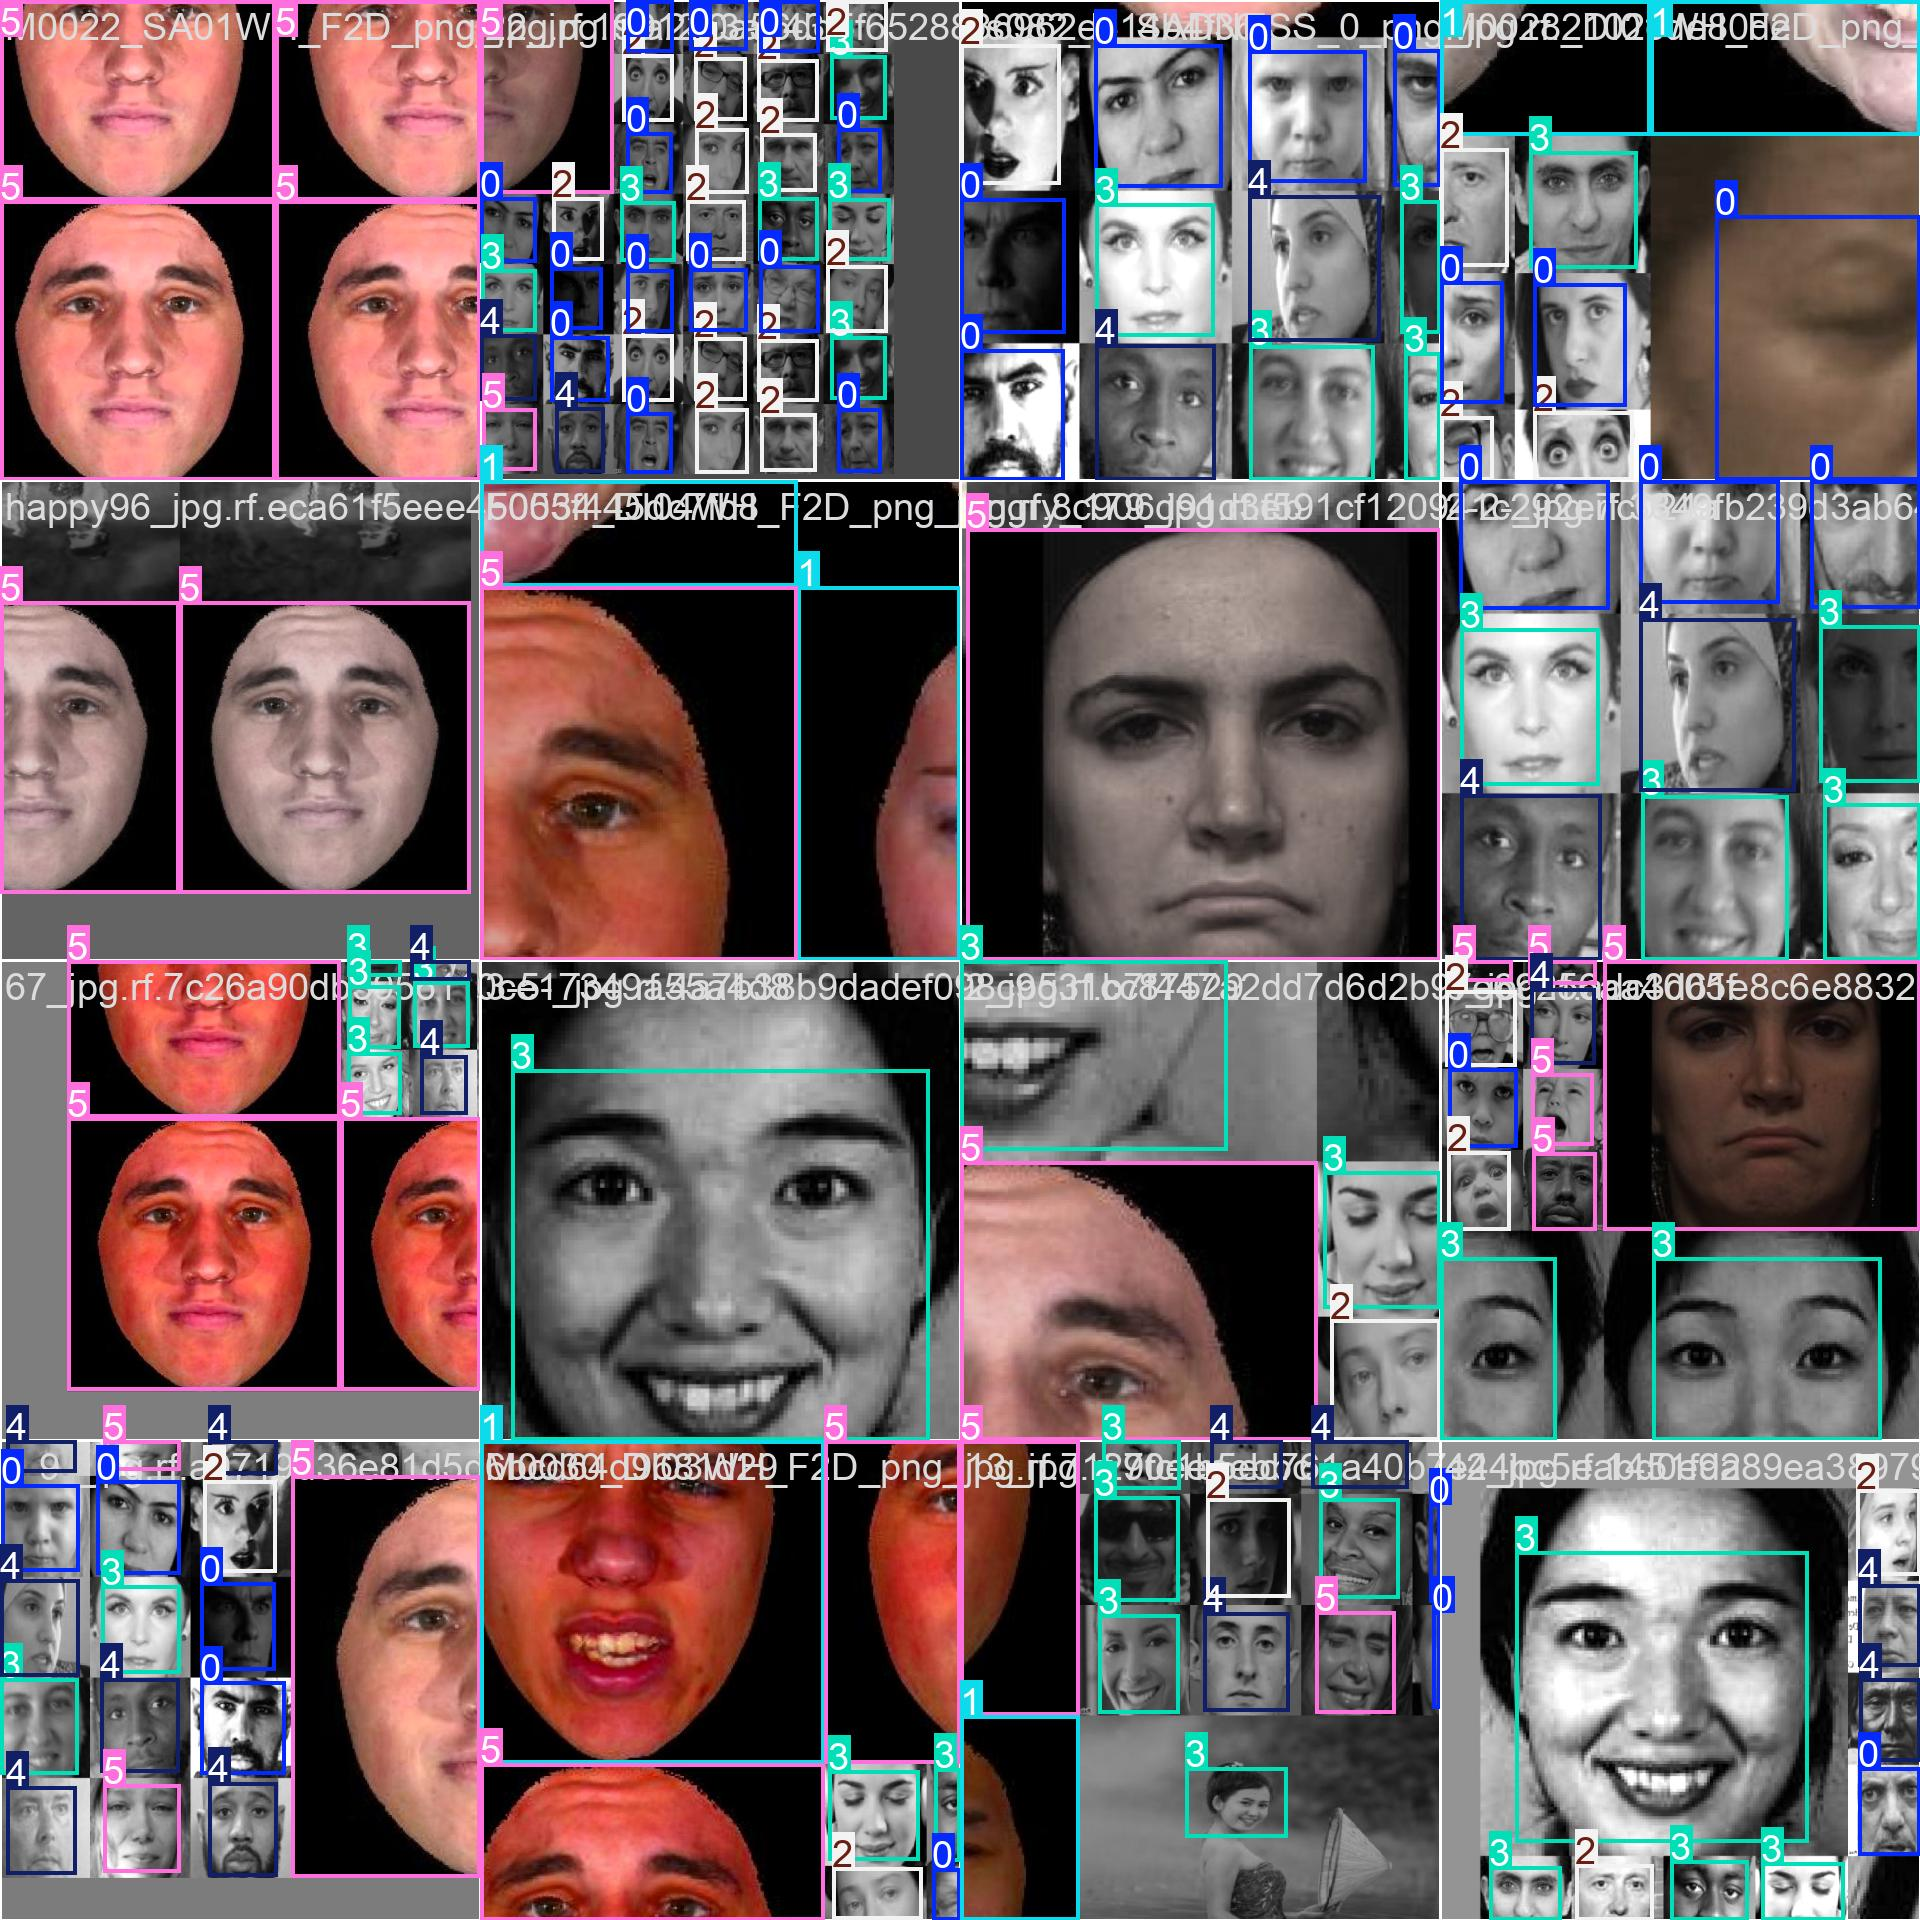

In [12]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

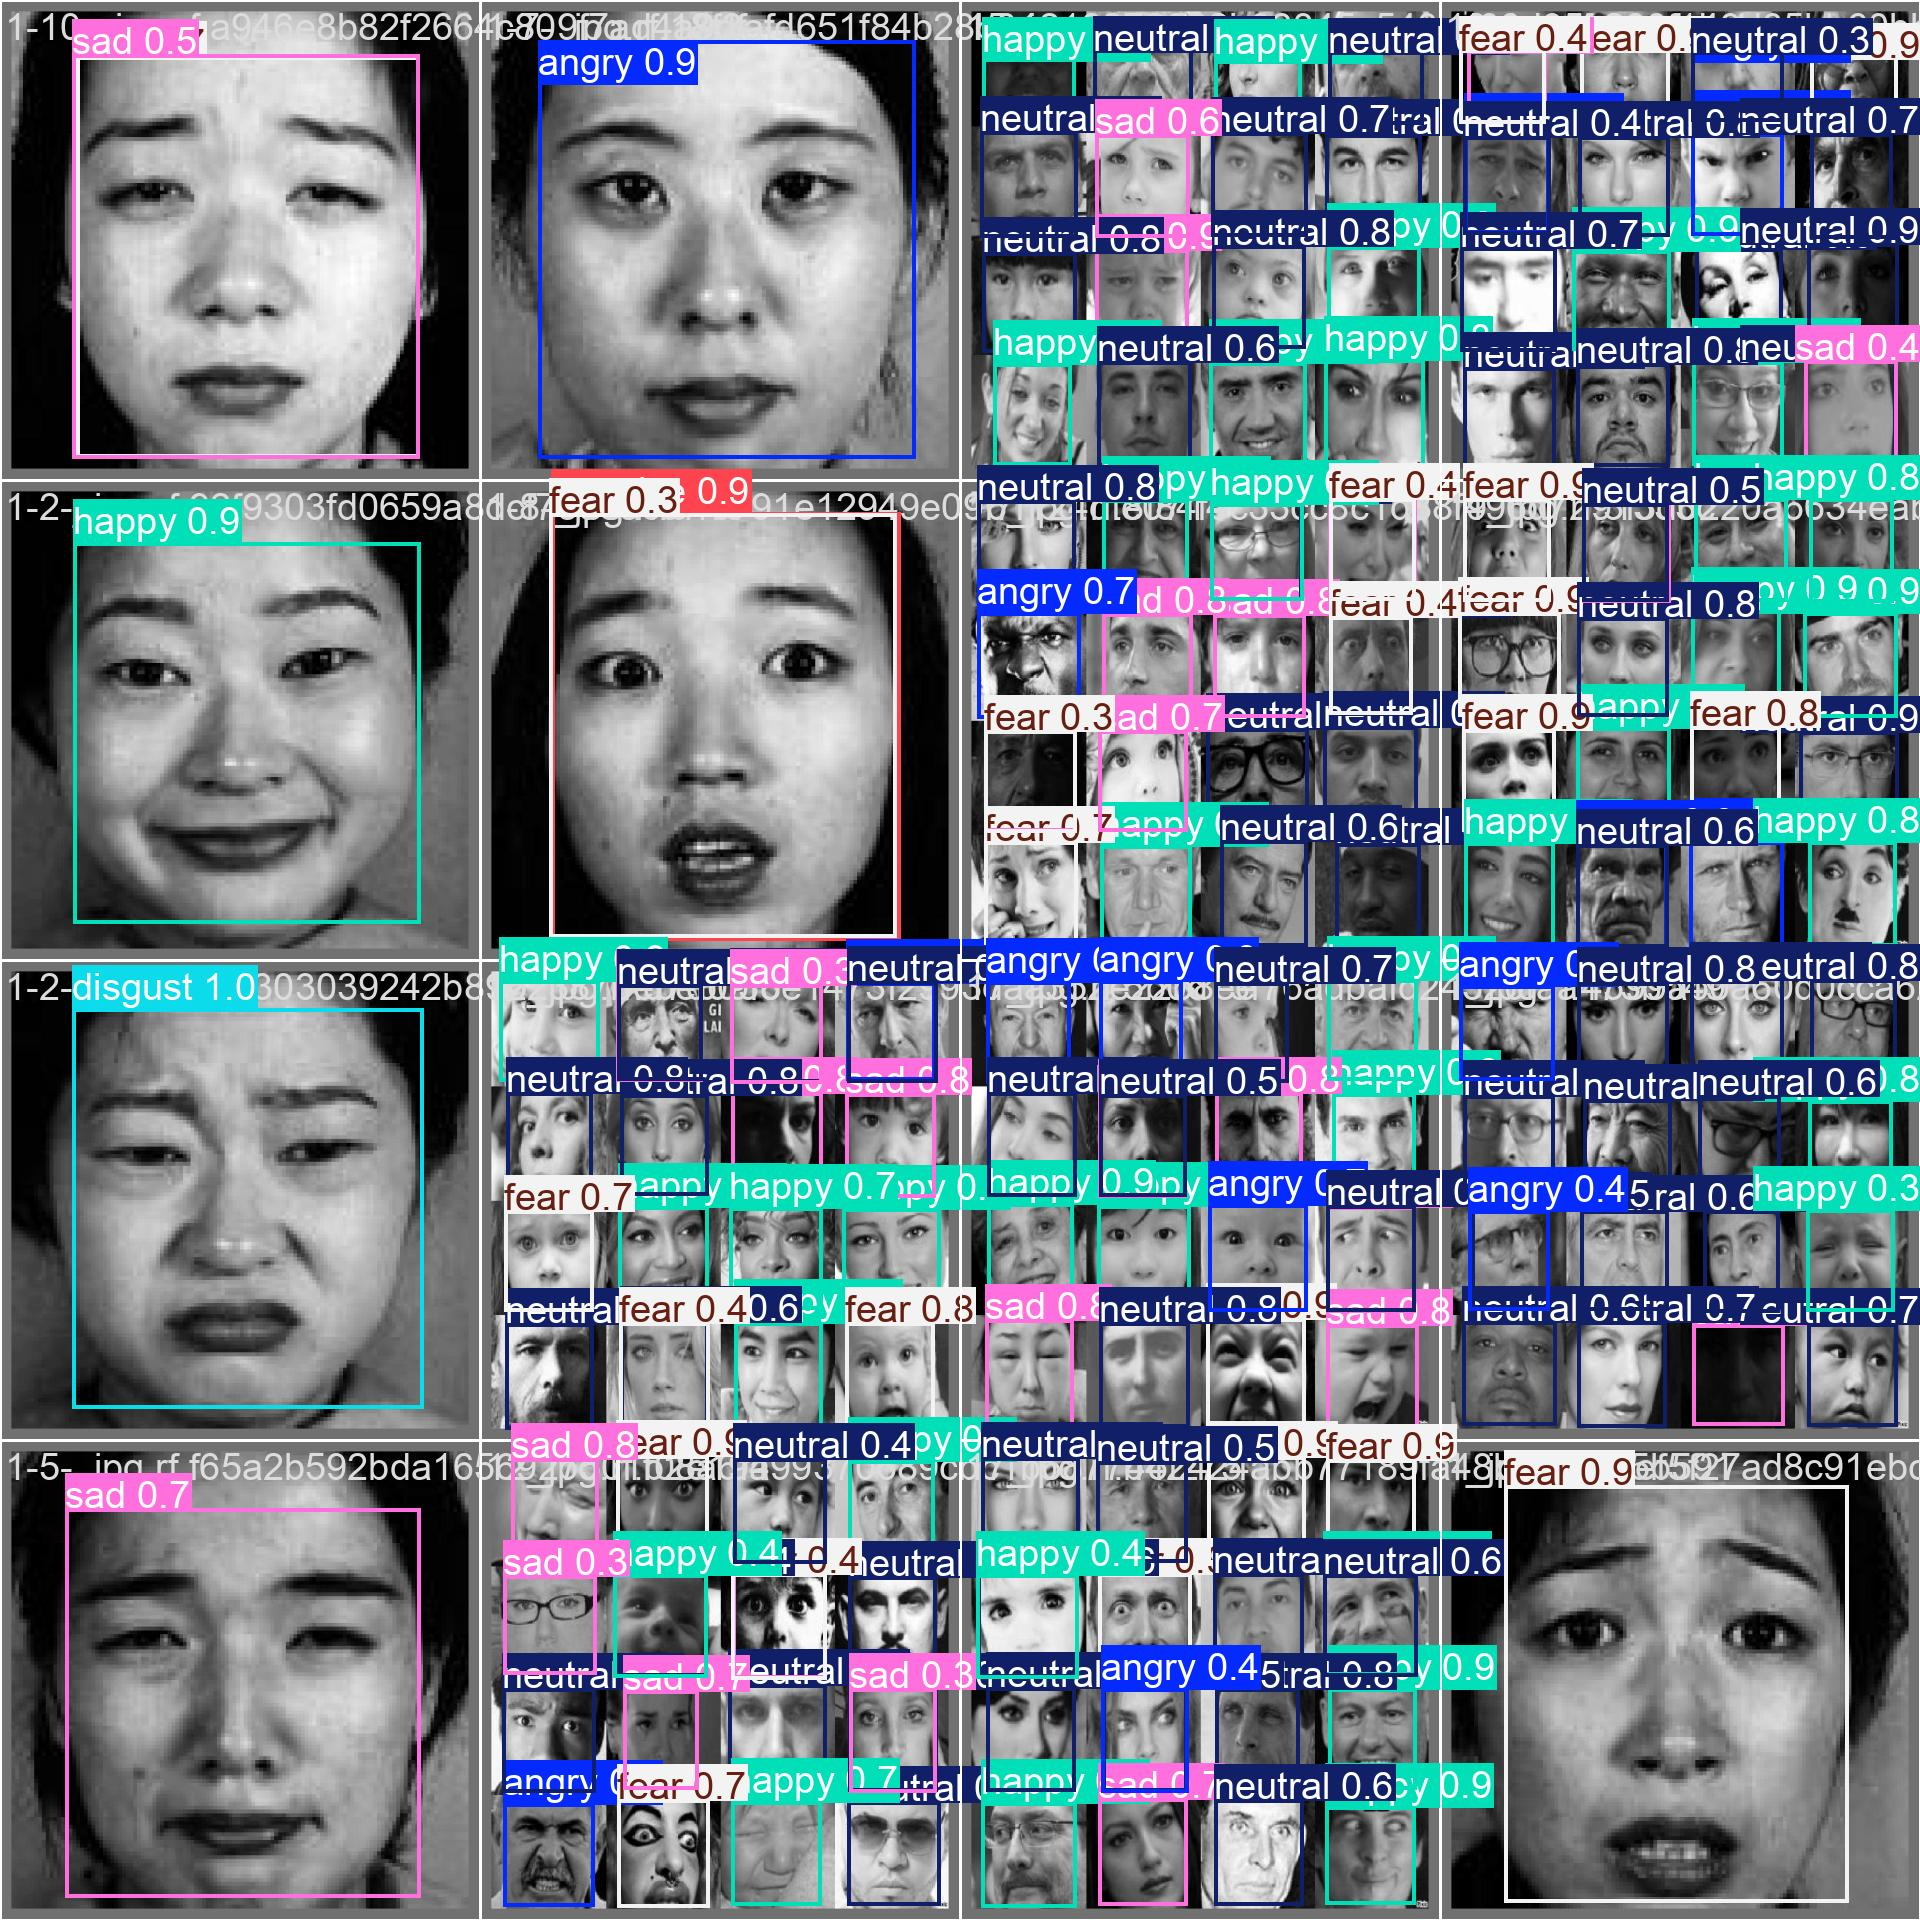

In [13]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

6. Model Validation <a name="validate"></a>

Evaluate the trained model on the validation set to assess its generalization capability.

In [14]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1369.3±145.8 MB/s, size: 31.3 KB)
val: Scanning /content/Facial-Emotion-Dataset--3/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100% 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:04<00:00,  2.71it/s]
                   all        185        862      0.684      0.748      0.777       0.65
                 angry         76        176      0.677      0.466      0.649      0.494
               disgust         18         18      0.841      0.889      0.935      0.918
                  fear         51        128      0.622      0.719      0.751      0.578
                 happy         64        180      0.774      0.833      0.868      0.635
               neutral         52       

7. Inference <a name="inference"></a>

Run the trained model on test images and user-uploaded images.

In [15]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/99 /content/Facial-Emotion-Dataset--3/test/images/1-5-_jpg.rf.fedd78c04d11645905c4124fa52aaa17.jpg: 640x640 1 angry, 17.8ms
image 2/99 /content/Facial-Emotion-Dataset--3/test/images/1-7-_jpg.rf.e66429ccfa57cb2c03c5e06fe43e3a8b.jpg: 640x640 1 fear, 17.3ms
image 3/99 /content/Facial-Emotion-Dataset--3/test/images/1-8-_jpg.rf.d4579ef9e8b6ca750aa61bd65ff33b47.jpg: 640x640 1 happy, 12.5ms
image 4/99 /content/Facial-Emotion-Dataset--3/test/images/10_jpg.rf.ce00a096968d9ce9ceb0a85b39e601cb.jpg: 640x640 1 angry, 5 fears, 4 happys, 6 neutrals, 3 sads, 14.0ms
image 5/99 /content/Facial-Emotion-Dataset--3/test/images/14_jpg.rf.26f69d5d4bfeffe1665b1558c11f95e9.jpg: 640x640 1 angry, 7 fears, 1 happy, 7 neutrals, 2 sads, 13.3ms
image 6/99 /content/Facial-Emotion-Dataset--3/test/images/2-3-_jpg.rf.2d5cb265aa6d734ebfffb7612bb0386

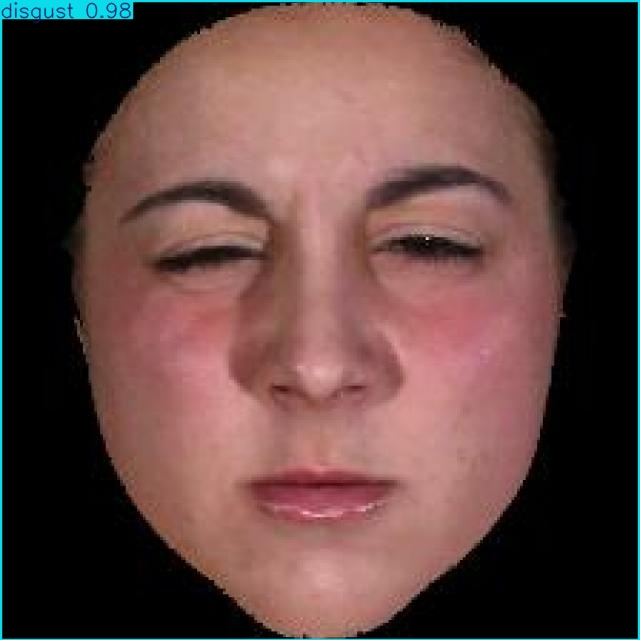

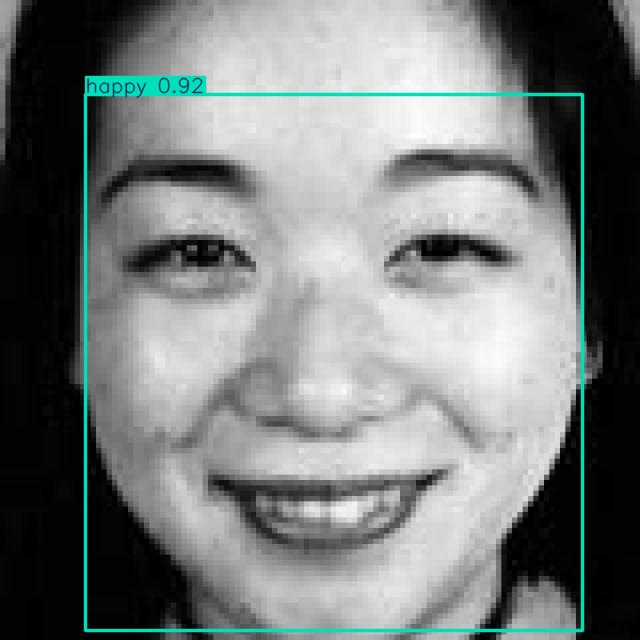

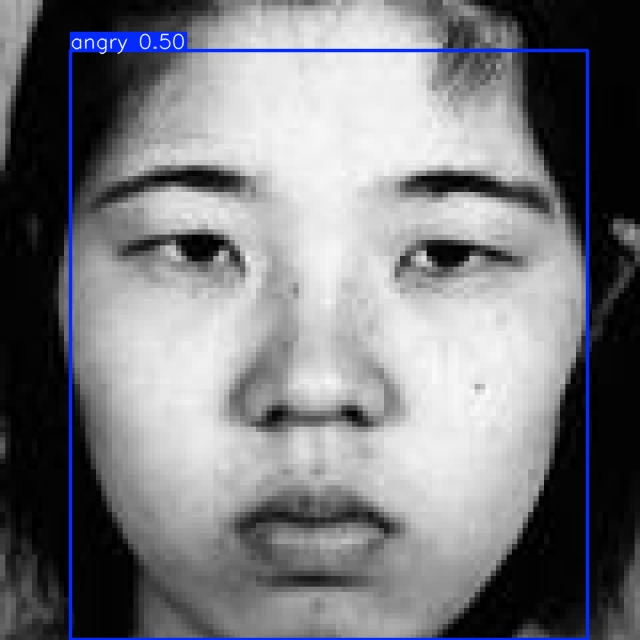

In [16]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [17]:
# Run Prediction on Test Images
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/99 /content/Facial-Emotion-Dataset--3/test/images/1-5-_jpg.rf.fedd78c04d11645905c4124fa52aaa17.jpg: 640x640 1 angry, 13.4ms
image 2/99 /content/Facial-Emotion-Dataset--3/test/images/1-7-_jpg.rf.e66429ccfa57cb2c03c5e06fe43e3a8b.jpg: 640x640 1 fear, 9.1ms
image 3/99 /content/Facial-Emotion-Dataset--3/test/images/1-8-_jpg.rf.d4579ef9e8b6ca750aa61bd65ff33b47.jpg: 640x640 1 happy, 8.6ms
image 4/99 /content/Facial-Emotion-Dataset--3/test/images/10_jpg.rf.ce00a096968d9ce9ceb0a85b39e601cb.jpg: 640x640 1 angry, 5 fears, 4 happys, 6 neutrals, 3 sads, 9.1ms
image 5/99 /content/Facial-Emotion-Dataset--3/test/images/14_jpg.rf.26f69d5d4bfeffe1665b1558c11f95e9.jpg: 640x640 1 angry, 7 fears, 1 happy, 7 neutrals, 2 sads, 8.7ms
image 6/99 /content/Facial-Emotion-Dataset--3/test/images/2-3-_jpg.rf.2d5cb265aa6d734ebfffb7612bb0386c.jp

User Upload:

Upload a custom image for inference.

In [18]:
from google.colab import files

uploaded = files.upload()  # This opens a file upload dialog
image_path = list(uploaded.keys())[0]  # Get the uploaded filename

print(f"Uploaded image: {image_path}")


Saving G40262.png to G40262.png
Uploaded image: G40262.png


In [19]:
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" conf=0.25 source="{image_path}" save=True


Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/G40262.png: 640x640 1 happy, 12.5ms
Speed: 5.1ms preprocess, 12.5ms inference, 142.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


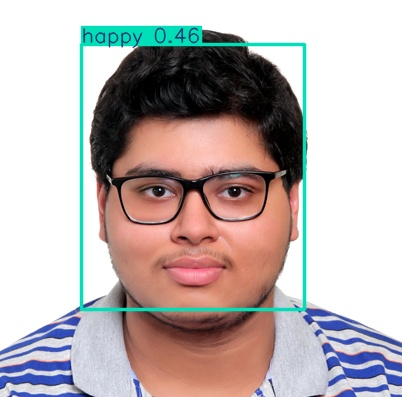

In [20]:
from IPython.display import display, Image

# Find the latest prediction folder
import glob
import os

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)

# Find the processed image
predicted_images = glob.glob(f'{latest_folder}/*.jpg')

# Display the first detected image
if predicted_images:
    display(Image(filename=predicted_images[0], width=600))
else:
    print("No predictions found.")


8. SOS Alert System <a name="sos"></a>

Integrate Twilio to send WhatsApp SOS alerts if "sad" or "fear" emotions are detected multiple times.

In [21]:
!export LC_ALL=C.UTF-8
!export LANG=C.UTF-8
!pip install twilio geocoder


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.6 MB/s eta 0:00:00


In [23]:
from twilio.rest import Client

# ✅ Use your Twilio credentials
account_sid = 'AC6d1efb1c45f12370d197c62a0df8501b'
auth_token = 'd7ed330afb835efe85b9cf03d42ab706'
twilio_whatsapp_number = 'whatsapp:+14155238886'  # Twilio's sandbox number for WhatsApp

# ✅ Initialize Twilio Client
client = Client(account_sid, auth_token)

# ✅ Function to validate WhatsApp number format
def validate_number(number):
    if number.startswith("+") and number[1:].isdigit():
        return True
    print("❌ Invalid phone number format. Use E.164 format (e.g., +911234567890).")
    return False

# ✅ Function to send SOS WhatsApp message
def send_sos_message(recipient_number):
    if not validate_number(recipient_number):
        return

    message_body = """
    🚨 *SOS ALERT* 🚨
    HELP YOUR CHILD!
    🆘 Suicide Prevention Helpline: 9152987821
    📞 Child Mental Health Support: 9820190844
    """

    try:
        message = client.messages.create(
            from_=twilio_whatsapp_number,  # Twilio's WhatsApp number
            body=message_body,
            to=f"whatsapp:{recipient_number}"
        )
        print(f"✅ Message sent successfully! Message SID: {message.sid}")
    except Exception as e:
        print(f"❌ Error sending message: {e}")

# ✅ User input for recipient number (with validation)
recipient_number = input("📲 Enter the recipient WhatsApp number with country code (e.g., +911234567890): ")
send_sos_message(recipient_number)


📲 Enter the recipient WhatsApp number with country code (e.g., +911234567890): +918076412694
✅ Message sent successfully! Message SID: SMe9748ba024d0a4f23062433ddd962a80


In [24]:
def verify_sos_trigger(predictions):
    """
    Check if SOS alert should be triggered based on detected emotions.
    Alert is sent if "sad" or "fear" is detected at least 3 times.
    """
    if predictions.count("sad") >= 3 or predictions.count("fear") >= 3:
        return True  # Send alert
    return False  # Ignore false positives

# ✅ Simulated detected emotions
emotion_history = ["happy", "sad", "neutral", "sad", "sad"]  # Example emotions detected

# ✅ Check if SOS should be sent
if verify_sos_trigger(emotion_history):
    send_sos_message("+911234567890")  # Replace with the actual recipient number


✅ Message sent successfully! Message SID: SMe0401849278b8ac8f95d7d8711d41274


9. Conclusion<a name="conclusion"></a>

This notebook demonstrates the complete pipeline for facial emotion detection using YOLOv11 and Roboflow, including model training, evaluation, inference, and WhatsApp-based alerting.

---

**Project Summary:**  
This notebook covers the full pipeline for facial emotion detection using YOLO and Roboflow, including model training, evaluation, inference, and WhatsApp alert integration.